In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

/var/folders/lt/ynlmc46s689c_6jkjkplxzt80000gn/T/ipykernel_98586/3772209798.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This is a single perceptron model that DOES NOT use PyTorch!

Propagation and optimization functions are the same as slideshow, except our activation function is not a sigmoid but a unit step (so we ignore its derivative).

In [2]:
def forward_propagation(x, y, weights, bias): 
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature's value
    y: label (0 or 1)
    weights: weights of the perceptron
    bias: bias
    """
    y_pred = predict(x, weights, bias)
    loss = (y_pred - y)**2   
    d_loss = 2*(y_pred - y)
    
    return y_pred, loss, d_loss

In [3]:
def optimize_perceptron(x, y, learning_rate,  maxEpochs, ):
    """
    Optimizes the Perceptron's weights by looping over the same steps for the specified number of epochs.
    Steps:
    1. Forward propagate data point
    2. Backpropagate
    3. Update weights
    4. Check stop conditions while looping
    """
    epoch = 0
    error = 999
    weights = np.random.rand(x.shape[1])
    bias = np.random.rand()
    
    errors = list()
    epochs = list()
    
    # Loop until stop conditions are met
    while (epoch <= maxEpochs) and (error > 9e-4):
        
        loss_ = 0
        # Loop over every data point
        for i in range(x.shape[0]):
            
            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

            # Backpropagation
            partial_derivates = backpropagation(x[i], d_loss)
            
            # Learn by updating the weights of the perceptron
            weights = weights - (learning_rate * np.array(partial_derivates))

        # Evaluate the results
        for index, feature_value_test in enumerate(x):
            y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
            loss_ += loss

        errors.append(loss_/len(x))
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print('Epoch {}. loss: {}'.format(epoch, errors[-1]))

    
    return weights, bias, errors

In [4]:
def activation_function(prediction):
    """
    Receives the output of the perceptron's function as parameter, and applies the
    activation function on it.
    In this simple model, the activation function is a unit step which classifies
    negative inputs as 0 and positive inputs as 1.
    """
    if prediction >= 0:
        return 1
    return 0
  

def predict(x, weights, bias):
    """
    Predicts the class of a given data point (x) by running the input through 
    the neuron (dot product) and then applying the activation function.
    """
    prediction = np.dot(weights, x) + bias
    prediction = activation_function(prediction)
    
    return (prediction)

In [5]:
def backpropagation(x, d_loss):
    """
    Performs the Backpropagation step on a given data point.
    Receives as input the data point, the Perceptron's weights and the partial derivative of the loss
    over the predicted y.
    The received derivative is used to calculate the partial derivative of the loss over the weight of each feature.
    A list with the partial derivatives of the loss over each weight is returned.
    """
    partial_derivates = list()
    for feature_value in x:
        partial_derivates.append(d_loss*feature_value)
        
    return partial_derivates   

### Formatting our Data

In [7]:
data = pd.read_csv('data_mnist.zip')

# Take only data with labels 1
data_ones = data[data['label'] == 1]

# Take only data with labels 0
data_zeros = data[data['label'] == 0]

# If you want to change either digit, just change the label value to either a 0 or a 1 so the math works out
# Ex. data_zeros = data[data['label'] == 7]
#     data_zeros['label'] = 0

# Concatenate instances with label 0 and 1
data = pd.concat([data_ones, data_zeros])
print(data.shape)
print(np.unique(data['label'].to_numpy()))

# # Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('label', axis=1).to_numpy()
x_test = test_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Rescale data points to values between 0 and 1 (pixels are originally 0-255)
x_train = x_train / 255.
x_test = x_test / 255.

(8816, 785)
[0 1]
(6612, 784)
(2204, 784)
(6612,)
(2204,)


In [8]:
def shrinkdata(data, res):
    """
    Reformats the input data at a lower resolution.
    data: Our input data matrix
    res:  The resolution (must be a factor of 28)
    """
    data = data[0:].reshape([data.shape[0], 28, 28])
    data = data.reshape(data.shape[0], res, int(28 / res), res, int(28 / res)).sum(axis=2).sum(axis=3)
    data = data / ((28 / res)**2)
    data = data[0:].reshape(data.shape[0], res**2)
    return data

def shrinkpoint(data, res):
    """
    Same as shrinkdata, but for a single 784 pixel image
    """
    data = data.reshape([28, 28])
    data = data.reshape(res, int(28 / res), res, int(28 / res)).sum(axis=1).sum(axis=2)
    data = data / ((28 / res)**2)
    data = data.reshape(res**2)
    return data

(-0.5, 27.5, 27.5, -0.5)

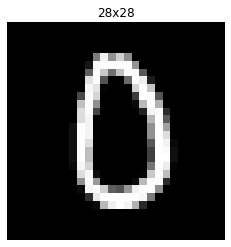

In [9]:
plt.imshow(x_train[1].reshape([28, 28]), cmap='Greys_r')
plt.title("28x28")
plt.axis('off')

(-0.5, 3.5, 3.5, -0.5)

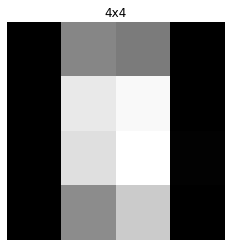

In [10]:
resolution = 4 # 4x4 image resolution
x_train_shrunk = shrinkdata(x_train, resolution)
x_test_shrunk = shrinkdata(x_test, resolution)

plt.imshow(x_train_shrunk[1].reshape([resolution, resolution]), cmap='Greys_r')
plt.title("{}x{}".format(resolution, resolution))
plt.axis('off')

In [12]:
def calculate_accuracy(x_test, y_test, weights, bias, resolution):
    
    correct = 0

    for sample, label in zip(x_test, y_test):

        #print(sample.shape)
        prediction = predict(shrinkpoint(sample, resolution), weights, bias)

        if prediction == label:
            correct += 1

    accuracy = correct / len(x_test)
    return accuracy

In [13]:
weights, bias, errors = optimize_perceptron(x_train_shrunk, y_train, learning_rate = 0.001, maxEpochs = 100)


Epoch 1. loss: 0.10178463399879008
Epoch 2. loss: 0.060193587416817906
Epoch 3. loss: 0.04839685420447671
Epoch 4. loss: 0.04310344827586207
Epoch 5. loss: 0.04053236539624924
Epoch 6. loss: 0.0382637628554144
Epoch 7. loss: 0.03614640048396854
Epoch 8. loss: 0.03508771929824561
Epoch 9. loss: 0.03402903811252268
Epoch 10. loss: 0.0323653962492438
Epoch 11. loss: 0.03206291591046582
Epoch 12. loss: 0.030399274047186932
Epoch 13. loss: 0.029340592861464006
Epoch 14. loss: 0.028886872353297035
Epoch 15. loss: 0.0279794313369631
Epoch 16. loss: 0.028433151845130067
Epoch 17. loss: 0.027828191167574106
Epoch 18. loss: 0.02722323049001815
Epoch 19. loss: 0.02676950998185118
Epoch 20. loss: 0.02661826981246219
Epoch 21. loss: 0.02601330913490623
Epoch 22. loss: 0.025559588626739262
Epoch 23. loss: 0.025408348457350273
Epoch 24. loss: 0.025257108287961284
Epoch 25. loss: 0.024652147610405323
Epoch 26. loss: 0.024803387779794312
Epoch 27. loss: 0.0249546279491833
Epoch 28. loss: 0.024500907441

Text(0.5, 0, 'Epochs')

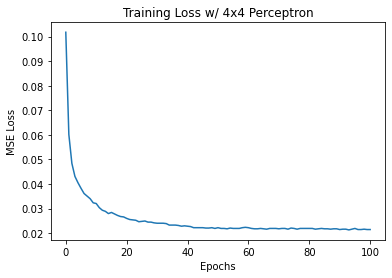

In [14]:
plt.plot(errors)
plt.title("Training Loss w/ 4x4 Perceptron")
plt.ylabel("MSE Loss")
plt.xlabel("Epochs")

In [15]:
acc = calculate_accuracy(x_test, y_test, weights, bias, resolution)
print('Accuracy: ', acc)

Accuracy:  0.9795825771324864


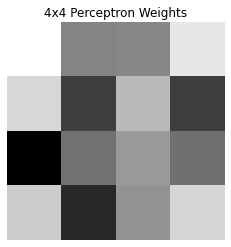

[[ 0.67550135 -0.0649611  -0.05611256  0.4521313 ]
 [ 0.33783374 -0.38601698  0.16466004 -0.39237465]
 [-0.64874409 -0.16054416  0.02939129 -0.16262015]
 [ 0.26817223 -0.4705208   0.00244893  0.32724305]]


In [16]:
weights.resize((resolution, resolution))
plt.imshow(weights, cmap='Greys_r')
plt.axis('off')
plt.title("4x4 Perceptron Weights")
plt.show()

print(weights)

In [22]:
np.savetxt("{}x{}weights".format(resolution, resolution), weights, delimiter=",")